#### <font color="#03997A"> Diplomado en Ciencia de datos UNAM </font>

##### <font color="#03997A"> Dr: Eduardo Espinosa A. </font>

##### <font color="#03997A"> Modulo 7 Aprendizaje de Maquina NO supervisado </font>

##### <font color="#03997A"> Practica 1 </font>

##### <font color="#03997A"> Temas 4 y 5: Agrupamiento / Clustering con el método Reglas de Asociación y PCA 
##### Alumno: Ibarra Ramírez Sergio </font>

#### Reglas de asociación:  Utilizando el conjunto de datos Online Retail:
https://archive.ics.uci.edu/ml/datasets/online+retail
Obtener el conjunto de artículos frecuentes así como reglas de asociación que se puedan extraer del
mismo

In [1]:
import pandas as pd

retail = pd.read_excel('Online Retail.xlsx')
retail.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


Vamos a 'limpiar' un poco la data de retail 

In [2]:
# Drop rows with missing values
retail = retail.dropna()

# Convert the 'Description' column to a factor (categorical) variable
retail['Description'] = retail['Description'].astype('category')

# Convert the 'Country' column to a factor (categorical) variable
retail['Country'] = retail['Country'].astype('category')

# Convert the 'InvoiceDate' column to a date format
retail['Date'] = pd.to_datetime(retail['InvoiceDate'])

# Extract the time from the 'InvoiceDate' column
retail['Time'] = retail['InvoiceDate'].dt.strftime('%H:%M:%S')

# Convert the 'InvoiceNo' column to numeric
retail['InvoiceNo'] = pd.to_numeric(retail['InvoiceNo'], errors='coerce')

# Display the summary of the DataFrame
print(retail.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  float64       
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  category      
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  category      
 8   Date         406829 non-null  datetime64[ns]
 9   Time         406829 non-null  object        
dtypes: category(2), datetime64[ns](2), float64(3), int64(1), object(2)
memory usage: 29.3+ MB
None


In [3]:
retail.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Time
0,536365.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,08:26:00
1,536365.0,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,08:26:00
2,536365.0,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,08:26:00
3,536365.0,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,08:26:00
4,536365.0,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,08:26:00


#### ¿ A qué hora la gente compra normalmente online? 

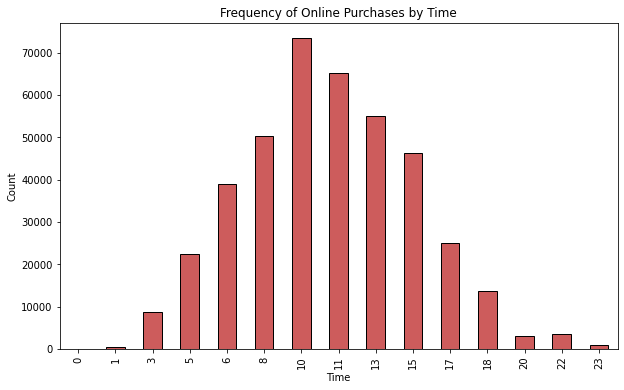

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'Time' column to datetime type
retail['Time'] = pd.to_datetime(retail['Time'])

# Categorize 'Time' column into 24-hour segments
retail['Time_Category'] = pd.cut(retail['Time'].dt.hour, bins=24, labels=False)

# Plot a histogram of the 'Time_Category' column
plt.figure(figsize=(10, 6))
retail['Time_Category'].value_counts().sort_index().plot(kind='bar', color='indianred', edgecolor='black')
plt.xlabel('Time')
plt.ylabel('Count')
plt.title('Frequency of Online Purchases by Time')
plt.xticks(rotation=90)
plt.show()


#### ¿ Cuántos objetos son comprados en promedio por cada cliente? 

In [12]:
# Group by 'InvoiceNo' and calculate the mean of 'Quantity' for each group
n_items = retail.groupby('InvoiceNo')['Quantity'].mean()
n_items.value_counts()

1.000000     279
12.000000    262
10.000000    208
6.000000     168
24.000000    168
            ... 
32.333333      1
19.147059      1
15.392857      1
4.325000       1
13.238095      1
Name: Quantity, Length: 7165, dtype: int64

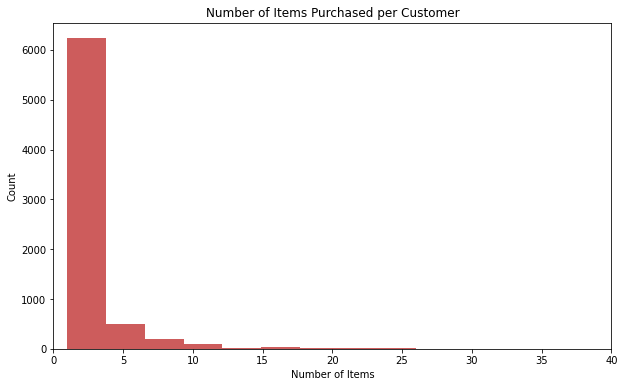

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by 'InvoiceNo' and calculate the mean of 'Quantity' for each group
n_items = retail.groupby('InvoiceNo')['Quantity'].mean()
n_items_count = n_items.value_counts()
# Plot a histogram of the number of items purchased per customer
plt.figure(figsize=(10, 6))
plt.hist(n_items_count, color='indianred', bins=100)
plt.xlabel('Number of Items')
plt.xlim(0, 40)  # Set the x-axis limits to 0 and 1000
plt.ylabel('Count')
plt.title('Number of Items Purchased per Customer')
plt.axvline(x=80, color='black', linestyle='--')  # Add a vertical line at x=80
plt.show()


¿Cuáles son los 10 artticulos más vendidos? 

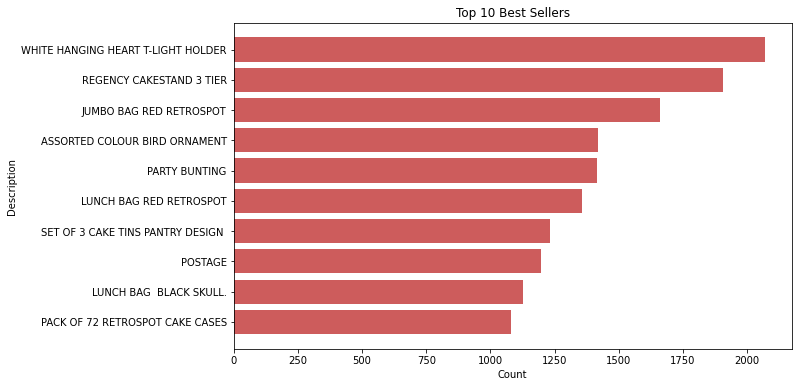

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by 'StockCode' and 'Description' and calculate the count for each group
top_sellers = retail.groupby(['StockCode', 'Description']).size().reset_index(name='count')

# Sort by descending count
top_sellers = top_sellers.sort_values(by='count', ascending=False)

# Plot the top 10 best sellers
top_10 = top_sellers.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_10['Description'], top_10['count'], color='indianred')
plt.xlabel('Count')
plt.ylabel('Description')
plt.title('Top 10 Best Sellers')
plt.gca().invert_yaxis()  # Invert the y-axis to show highest count at the top
plt.show()


#### Implementando reglas de asociación 

Before using any rule mining algorithm, we need to transform the data from the data frame format, into transactions such that we have all the items bought together in one row.

In [16]:
import pandas as pd

# Sort the retail data by 'CustomerID'
retail_sorted = retail.sort_values(by='CustomerID')

# Group by 'CustomerID' and 'Date' and concatenate the 'Description' values
itemList = retail.groupby(['CustomerID', 'Date'])['Description'].apply(lambda x: ','.join(x)).reset_index()
itemList

,CustomerID,Date,Description
0,12346.0,2011-01-18 10:01:00,MEDIUM CERAMIC TOP STORAGE JAR
1,12346.0,2011-01-18 10:17:00,MEDIUM CERAMIC TOP STORAGE JAR
2,12347.0,2010-12-07 14:57:00,"BLACK CANDELABRA T-LIGHT HOLDER,AIRLINE BAG VI..."
3,12347.0,2011-01-26 14:30:00,"PINK NEW BAROQUECANDLESTICK CANDLE,BLUE NEW BA..."
4,12347.0,2011-04-07 10:43:00,"AIRLINE BAG VINTAGE JET SET WHITE,AIRLINE BAG ..."
...,...,...,...
22029,18283.0,2011-11-30 12:59:00,"SET OF 6 SNACK LOAF BAKING CASES,10 COLOUR SPA..."
22030,18283.0,2011-12-06 12:02:00,"FELTCRAFT HAIRBAND RED AND BLUE,PACK OF 12 DOL..."
22031,18287.0,2011-05-22 10:39:00,"SMALL PURPLE BABUSHKA NOTEBOOK ,SMALL RED BABU..."
22032,18287.0,2011-10-12 10:23:00,"HAND WARMER OWL DESIGN,SET OF 3 WOODEN SLEIGH ..."
